In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ddf= pd.read_csv('/content/drive/MyDrive/Proyecto Fraude/DDF.csv',sep='|')

In [4]:
ddf.head()

,monto,es_fraude,balance_prev_or,balance_prev_des,hora,tipo_binario
0,181.00,1,181.0,0.0,7,1
1,181.00,1,181.0,21182.0,7,0
2,229133.94,0,15325.0,5083.0,7,0
3,215310.30,0,705.0,22425.0,7,1
4,311685.89,0,10835.0,6267.0,7,1


In [5]:
ddf.shape

(2770360, 6)

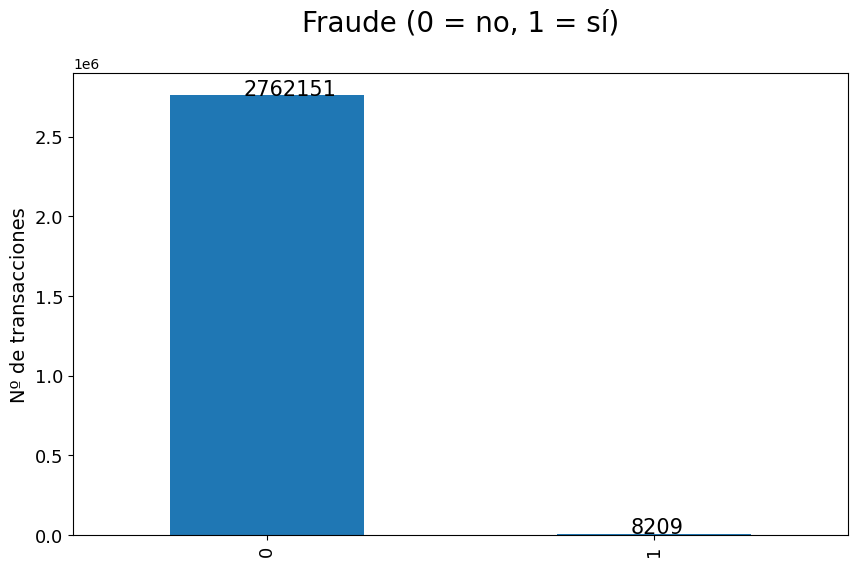

In [6]:
ax = ddf['es_fraude'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(14,12)})

# Para suprimir los warnings de scikitlearn por convergencia prematura
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [8]:
X = ddf[['monto','balance_prev_or','balance_prev_des', 'hora','tipo_binario']]
y = ddf[['es_fraude']]

In [9]:
y.value_counts()

es_fraude
0            2762151
1               8209
dtype: int64

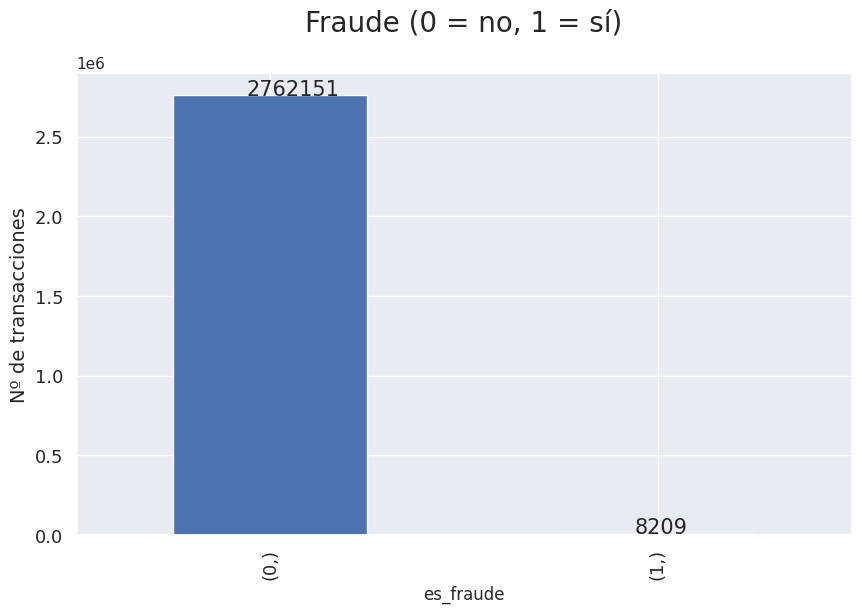

In [10]:
ax = y.value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [11]:
from imblearn.over_sampling import SMOTE
'''generar muestras sintéticas adicionales de la clase minoritaria para equilibrar la distribución de clases en
el conjunto de datos.'''
smote = SMOTE(sampling_strategy='minority')
'''actualiza Xe ycon las muestras sintéticas generadas para abordar el problema de desequilibrio de clases en el
conjunto de datos.'''
X, y = smote.fit_resample(X, y)

In [12]:
y.value_counts()

es_fraude
0            2762151
1            2762151
dtype: int64

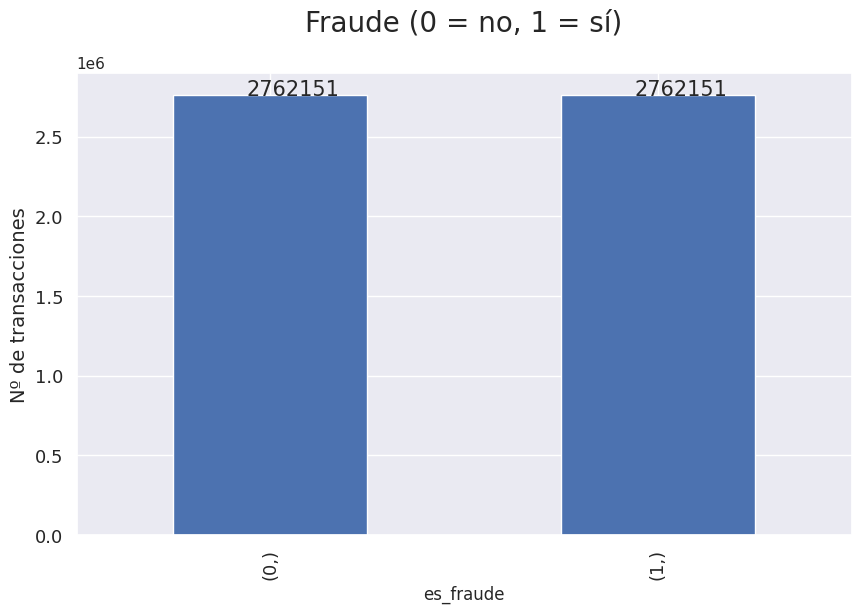

In [13]:
ax = y.value_counts().plot(kind='bar', figsize=(10,6), fontsize=13)
ax.set_title('Fraude (0 = no, 1 = sí)', size=20, pad=30)
ax.set_ylabel('Nº de transacciones', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(),2)), fontsize=15)

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3867011, 5)
(3867011, 1)
(1657291, 5)
(1657291, 1)


In [ ]:
mean = X_train.mean(axis=0)

In [ ]:
median = X_train.median(axis=0)

In [ ]:
pd.concat([mean, median, mean-median], axis=1, keys=["Media", "Mediana", "Diferencia"])

,Media,Mediana,Diferencia
monto,8.885760e+05,232862.900000,655713.059270
balance_prev_or,8.440278e+05,65326.210317,778701.598032
balance_prev_des,1.115666e+06,134027.987066,981638.133511
hora,1.189829e+01,13.000000,-1.101707
tipo_binario,2.846873e-01,0.000000,0.284687


In [ ]:
#TODO
#Obtener 1.5 el rango intercuartilico
iqrx15 = (X_train.quantile(.75) - X_train.quantile(.25))*1.5
#Obtener los valores maximos
maxs = X_train.max()
#Obtener los valores minimos
mins = X_train.min()
#Definir un limite superior igual a la mediana mas 1.5 veces el rango intercuartilico
sup = median + iqrx15
#Definir un limite inferior igual a la mediana menos 1.5 veces el rango intercuartilico
inf = median - iqrx15
#Comprobar si los valores maximos estan mas alla del limite superior
out_sup = maxs > inf
#Comprobar si los valores minimos estan mas alla del limite inferior
out_inf = maxs < inf
#Mostramos para que variables existen valores atipicos
pd.concat([out_sup, out_inf], axis=1, keys=["Outlier Sup", "Outlier Inf"])

,Outlier Sup,Outlier Inf
monto,True,False
balance_prev_or,True,False
balance_prev_des,True,False
hora,True,False
tipo_binario,True,False


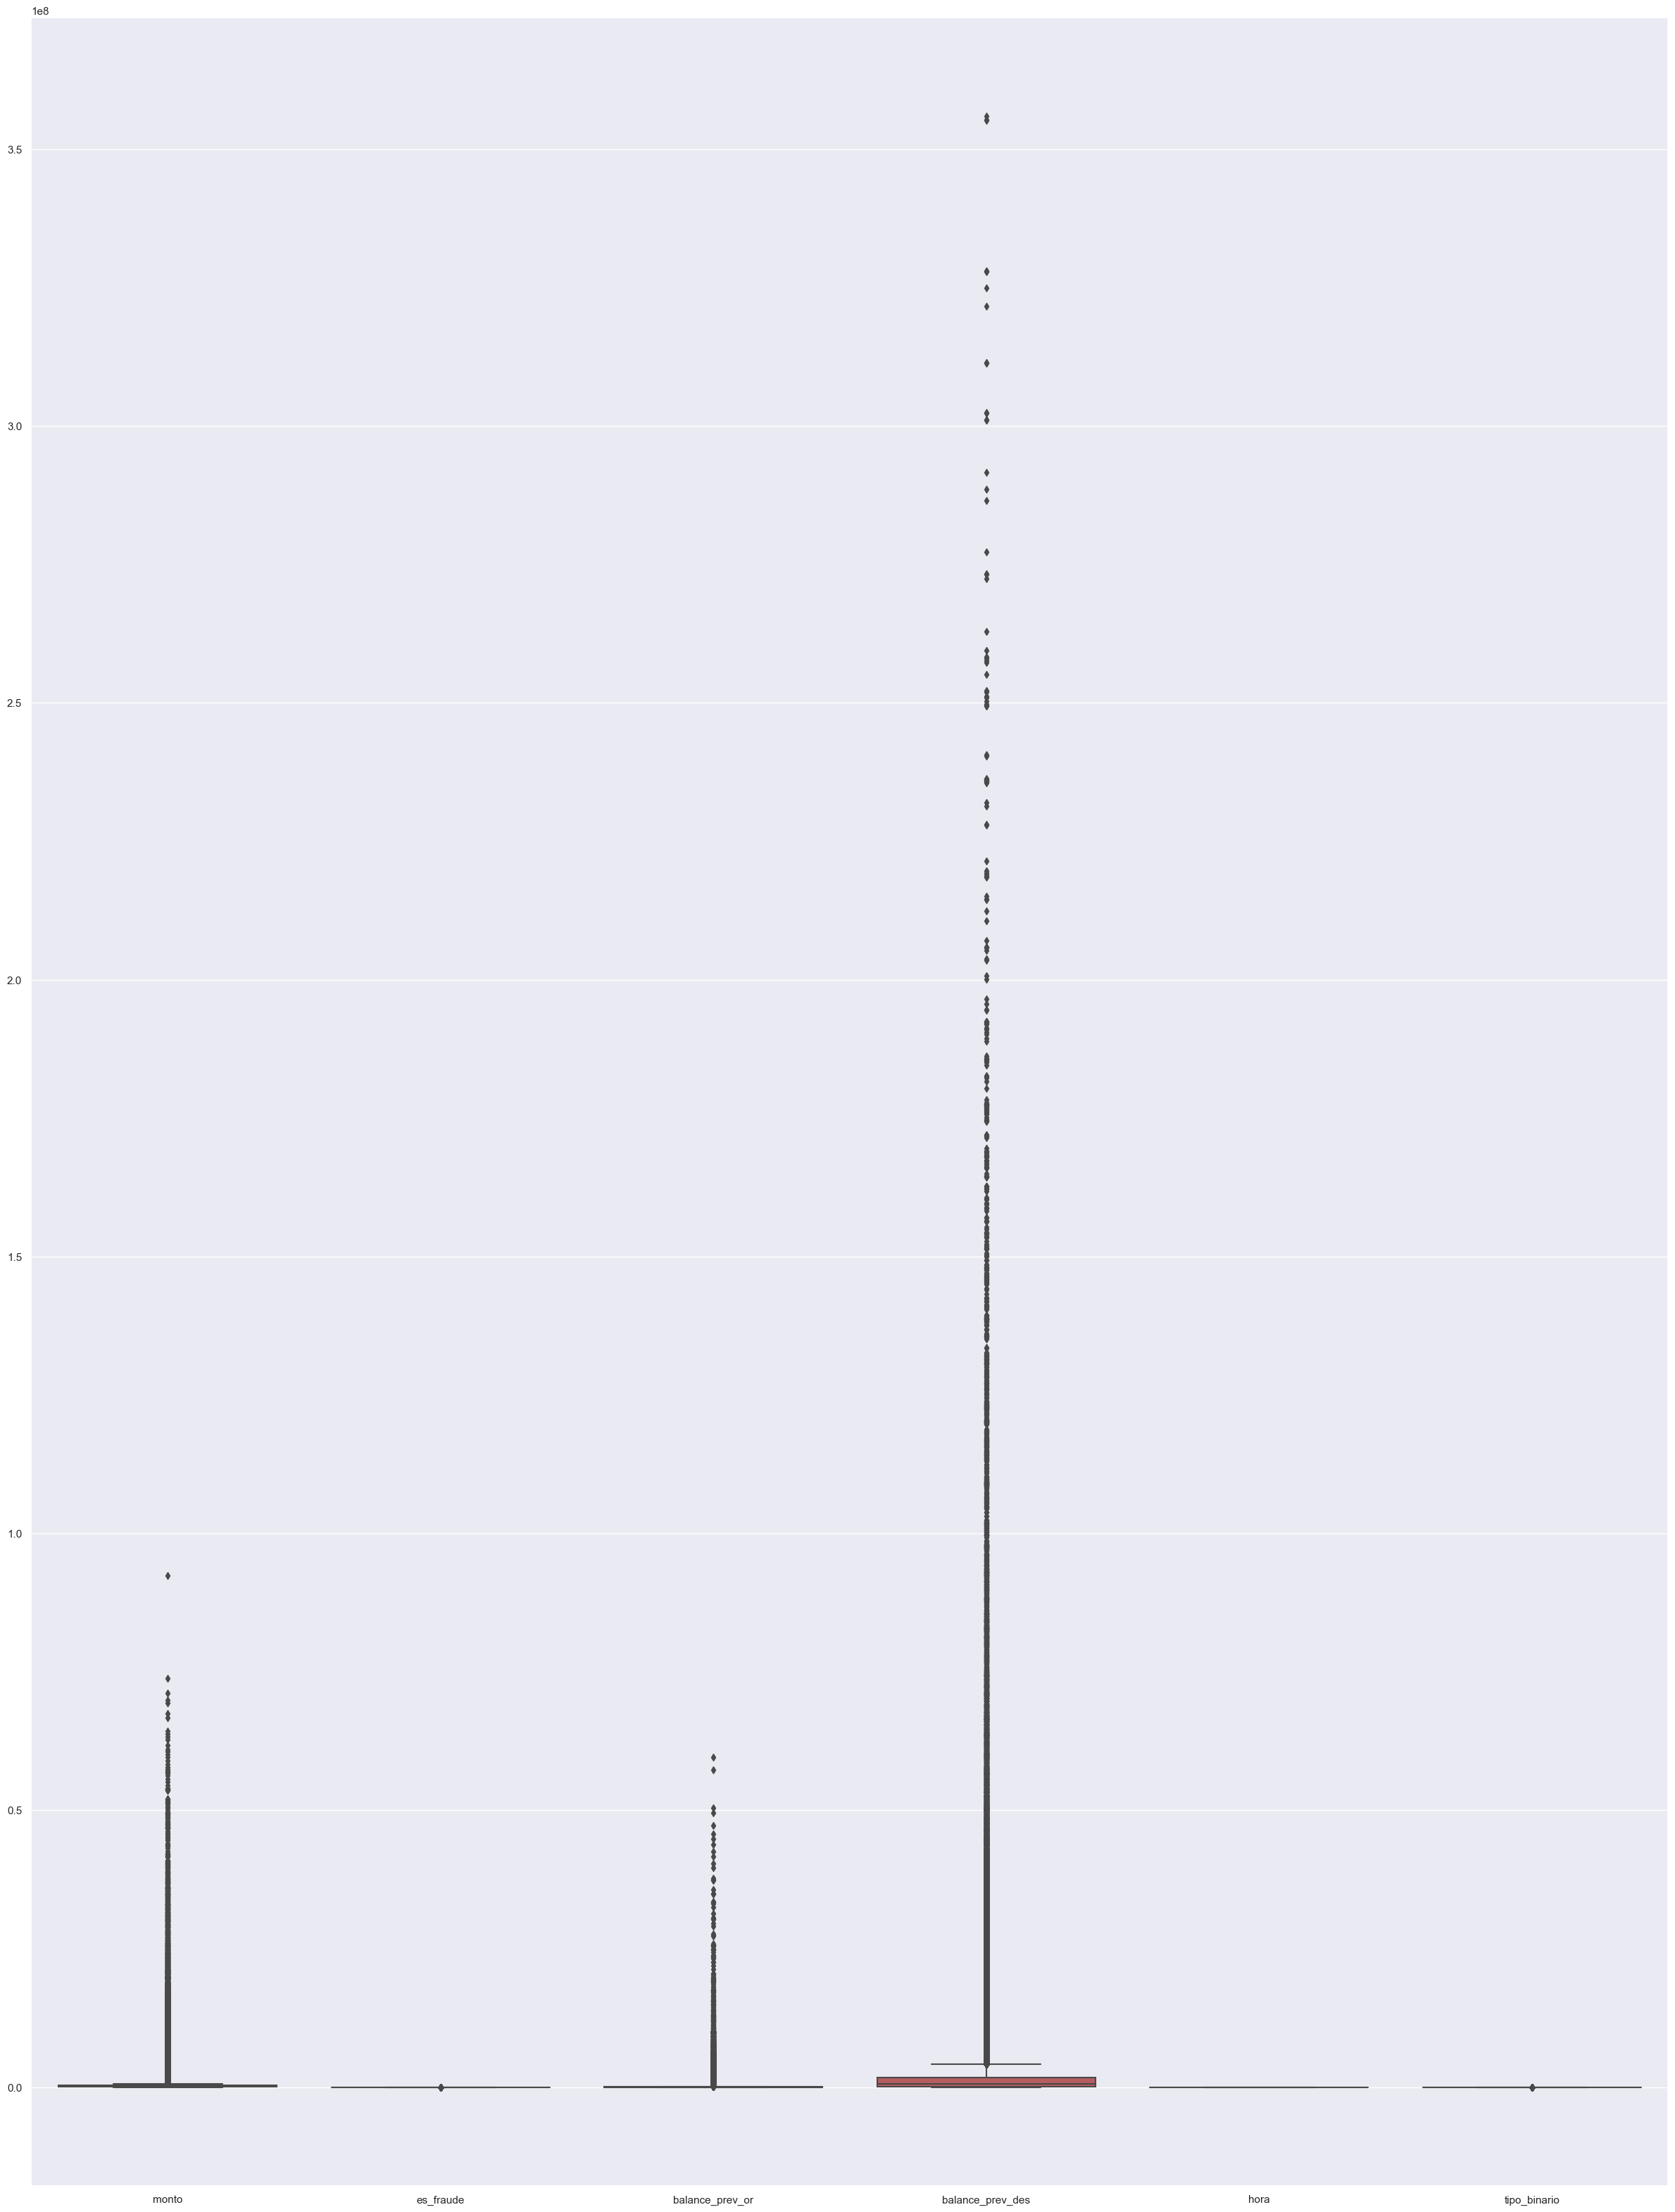

In [ ]:
plt.figure(figsize = (30,40))
sns.boxplot(data = ddf)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Normalizar los datos
scaler = RobustScaler()  # Definir el modelo de normalización
X_train = pd.DataFrame(scaler.fit_transform(X_train))  # Entrenar y normalizar los datos de entrenamiento, ajustamos parametros
X_test = pd.DataFrame(scaler.transform(X_test))  # Normalizar los datos de prueba

# Comprobar el resultado de la normalización
result = pd.concat([X_train.median(), X_test.median(),
                    (X_train.quantile(0.75) - X_train.quantile(0.25)),
                    (X_test.quantile(0.75) - X_test.quantile(0.25))],
                   axis=1,
                   keys=["Train median", "Test median", "Train iqr", "Test iqr"])
print(result)

   Train median  Test median  Train iqr  Test iqr
0           0.0     0.000547        1.0  1.004077
1           0.0     0.000282        1.0  1.008211
2           0.0    -0.000505        1.0  1.001099
3           0.0     0.000000        1.0  1.000000
4           0.0     0.000000        1.0  1.000000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
#definir y entrenar el modelo de regresion logistica
l_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\maria\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# obtener las predicciones para el conjunto de datos de testeo
y_est = l_reg.predict(X_test)

In [ ]:
precision = precision_score(y_test, y_est)
recall = recall_score(y_test, y_est)
print('precision: ' + str(precision))
print('recall: ' + str(recall))

precision: 0.8981873315097125
recall: 0.8206779060220133


Confusion matrix
[[750727  77157]
 [148731 680676]]
Normalized confusion matrix
[[0.90680216 0.09319784]
 [0.17932209 0.82067791]]


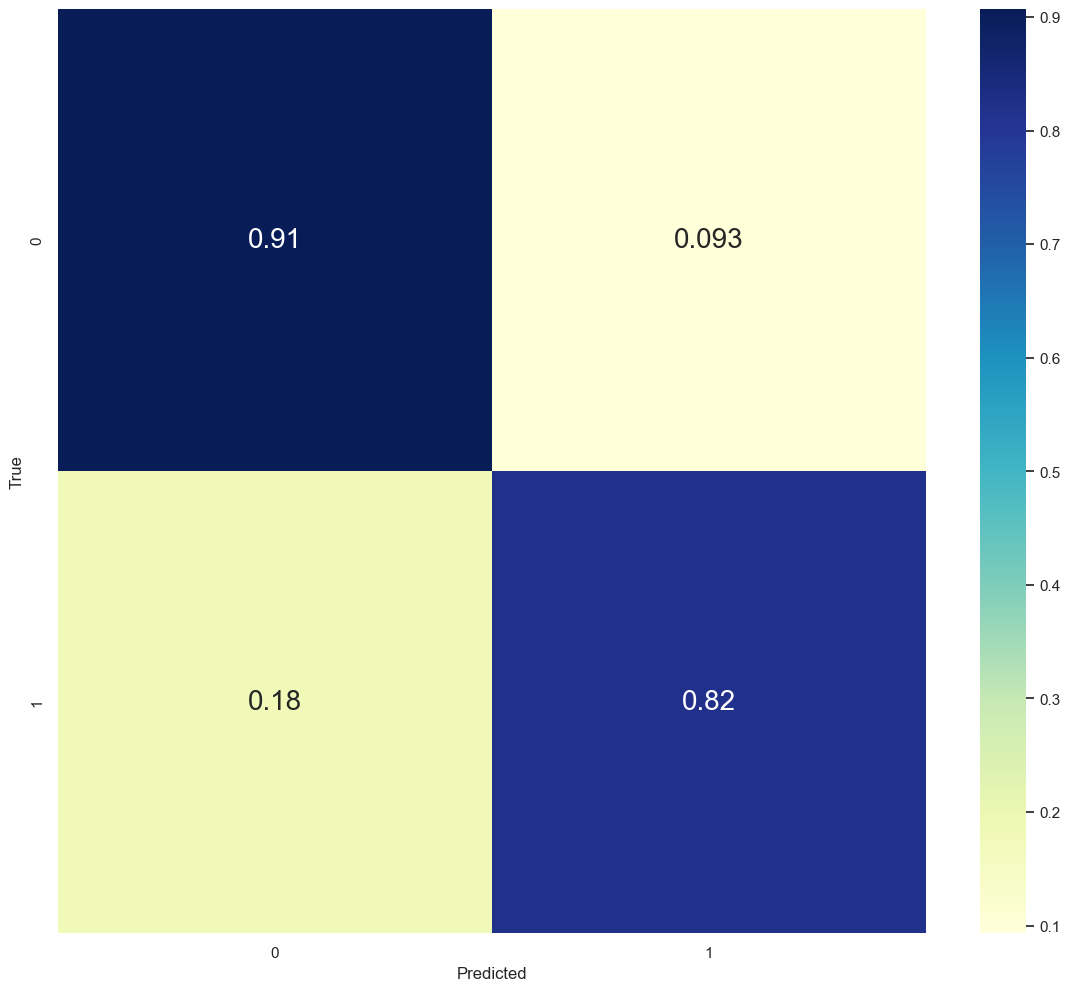

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(30)

#X = ddf[['monto','balance_prev_or','balance_prev_des', 'hora','tipo_binario']]
#y = ddf[['es_fraude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

import pandas as pd
from sklearn.preprocessing import RobustScaler

# Normalizar los datos
scaler = RobustScaler()  # Definir el modelo de normalización
X_train = pd.DataFrame(scaler.fit_transform(X_train))  # Entrenar y normalizar los datos de entrenamiento, ajustamos parametros
X_test = pd.DataFrame(scaler.transform(X_test))

clf_tree = DecisionTreeClassifier(criterion= 'gini')
clf_tree.fit(X_train, y_train)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)


#arbol=DecisionTreeClassifier()
#arbol.fit(X_train,y_train)
y_est = clf_tree.predict(X_test)

#print(arbol.score(X_test,y_test))
#print(arbol.score(X_train,y_train))

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
precision = precision_score(y_test, y_est)
recall = recall_score(y_test, y_est)
print('precision: ' + str(precision))
print('recall: ' + str(recall))

precision: 0.9964999181267398
recall: 0.9988498644698636


Confusion matrix
[[825786   2907]
 [   953 827645]]
Normalized confusion matrix
[[0.99649207 0.00350793]
 [0.00115014 0.99884986]]


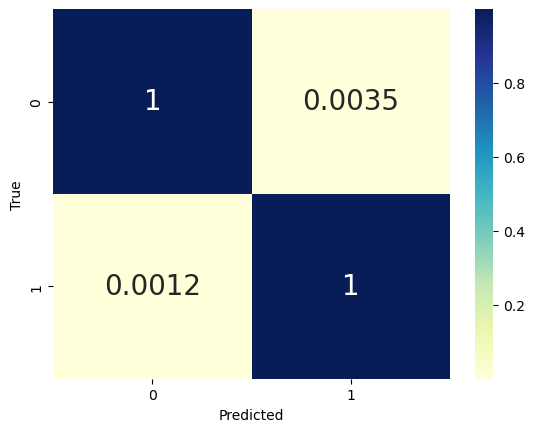

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_est)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
g = sns.heatmap(CM_norm, annot=True, cmap="YlGnBu", annot_kws={"size": 20}) \
       .set(ylabel='True', xlabel='Predicted')

In [ ]:
ddf.shape

(2770360, 6)

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(clf_tree, filled=True, feature_names=iris.feature_names)
plt.show()

NameError: name 'iris' is not defined

<Figure size 1500x1000 with 0 Axes>

DL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3867011, 5)
(3867011, 1)
(1657291, 5)
(1657291, 1)


In [ ]:
# Creamos el modelo (perceptron multicapa)
model = Sequential(
    [
    Dense(4, input_dim=X_train.shape[1], activation='selu'),
    Dense(8 , activation='selu'),
    Dense(4, activation='selu'),
    Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 24        
                                                                 
 dense_1 (Dense)             (None, 16)                80        
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, shuffle=True, epochs=10, batch_size=16)

Epoch 1/10
241689/241689 [==============================] - 549s 2ms/step - loss: 0.7607 - accuracy: 0.7093
Epoch 2/10
241689/241689 [==============================] - 538s 2ms/step - loss: 0.5747 - accuracy: 0.7245
Epoch 3/10
241689/241689 [==============================] - 540s 2ms/step - loss: 0.6020 - accuracy: 0.5940
Epoch 4/10
241689/241689 [==============================] - 534s 2ms/step - loss: 0.6931 - accuracy: 0.4998
Epoch 5/10
241689/241689 [==============================] - 531s 2ms/step - loss: 0.6931 - accuracy: 0.5004
Epoch 6/10
241689/241689 [==============================] - 541s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/10
241689/241689 [==============================] - 563s 2ms/step - loss: 0.6931 - accuracy: 0.4999
Epoch 8/10
241689/241689 [==============================] - 551s 2ms/step - loss: 0.6931 - accuracy: 0.4998
Epoch 9/10
241689/241689 [==============================] - 544s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 10/10
241689/241689 [=

In [ ]:
prediction = model.predict(X_test)
prediction = np.round(prediction)

51791/51791 [==============================] - 77s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
def metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    precision = tp / (tp+fp)
    print('Especificidad: {:.2f}'.format(specificity))
    print('Sensibilidad: {:.2f}'.format(sensitivity))
    print('Precision: {:.2f}'.format(precision))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap='RdPu')
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Especificidad: 0.00
Sensibilidad: 1.00
Precision: 0.50


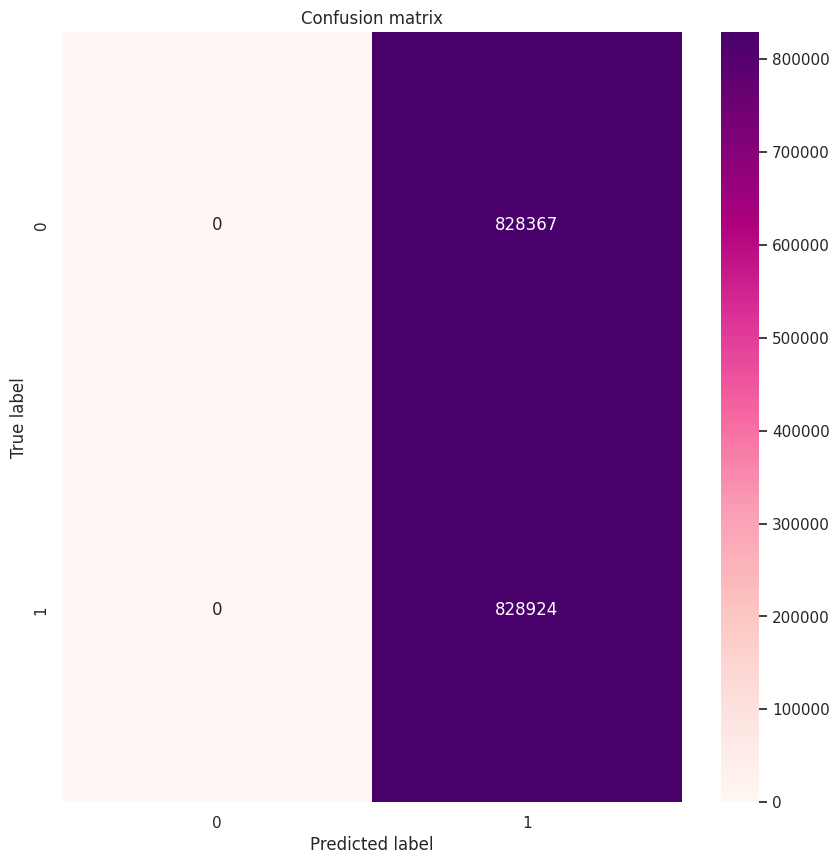

In [ ]:
metrics(y_test, prediction)

In [17]:
!pip install tensorflow_addons

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras #es una libreria
from tensorflow.keras import layers
import matplotlib as plt
import seaborn as sns
sns.set(style="darkgrid")

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(3867011, 5)

In [16]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
# Normalizar los datos
scaler = RobustScaler()  # Definir el modelo de normalización
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [32]:
#Modelo
#64 es el número de neuronas en la primera capa oculta, input_shape es la cantidad de variables que van a entrar, es decir, el número de columnas que tenga X_train
model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.tanh, input_shape=[X_train.shape[1]], name='h1'),
    layers.Dense(32, activation=tf.nn.tanh, name='h2'),
    layers.Dense(1,activation=tf.nn.sigmoid, name='o'),
  ])
#loss es la funcion de perdida,
model.compile(loss = 'BinaryCrossentropy',
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['Precision','Recall'])



In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 64)                384       
                                                                 
 h2 (Dense)                  (None, 32)                2080      
                                                                 
 o (Dense)                   (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
96676/96676 [==============================] - 169s 2ms/step - loss: 0.7382 - precision: 0.4995 - recall: 0.4997 - val_loss: 0.7234 - val_precision: 1.0000 - val_recall: 7.6399e-04
Epoch 2/5
96676/96676 [==============================] - 182s 2ms/step - loss: 0.7384 - precision: 0.4997 - recall: 0.4998 - val_loss: 0.8205 - val_precision: 1.0000 - val_recall: 7.6399e-04
Epoch 3/5
96676/96676 [==============================] - 166s 2ms/step - loss: 0.7388 - precision: 0.4998 - recall: 0.4980 - val_loss: 0.6980 - val_precision: 1.0000 - val_recall: 7.6399e-04
Epoch 4/5
96676/96676 [==============================] - 183s 2ms/step - loss: 0.7380 - precision: 0.4998 - recall: 0.4985 - val_loss: 0.7421 - val_precision: 0.5010 - val_recall: 1.0000
Epoch 5/5
96676/96676 [==============================] - 183s 2ms/step - loss: 0.7385 - precision: 0.5000 - recall: 0.4990 - val_loss: 0.6972 - val_precision: 1.0000 - val_recall: 7.6399e-04


In [36]:
# Obtener la precisión del modelo, evaluamos el modelo
model.evaluate(X_test, y_test)

51791/51791 [==============================] - 60s 1ms/step - loss: 0.6971 - precision: 1.0000 - recall: 7.4993e-04


[0.6971093416213989, 1.0, 0.0007499333587475121]

In [38]:
hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

df = hist.melt(id_vars='epoch', var_name='Type', value_name='Error',
               value_vars=['BinaryCrossentropy','val_BinaryCrossentropy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Error', hue='Type', data=df)


print("BinaryCrossentropyTrain: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("BinaryCrossentropyTest: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

KeyError: ignored